In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

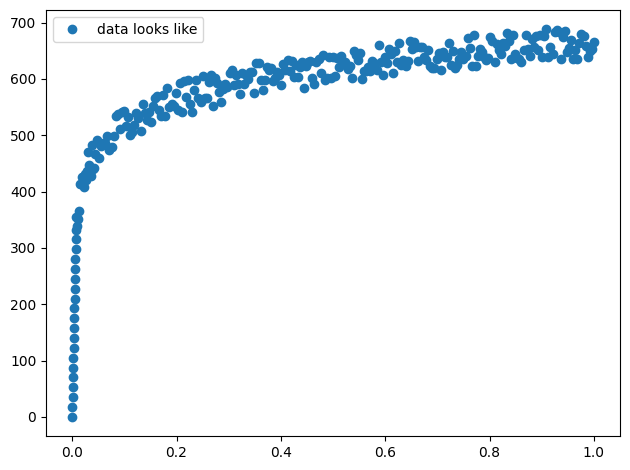

In [2]:
#data = np.loadtxt("E:/nmtuan97/1_scripts/ml_learning/data_test.csv", delimiter=',') #aks
data = np.loadtxt("C:/Users/nguyenminhtuan/Downloads/nmtuan97/scripts/1_ml/ml_learning/data_test.csv", delimiter=',') #home
X = data[:,:1]
y = data[:,1:2]

# noise = np.random.uniform(-25, 25, len(y)).reshape(len(y),1)
X = MinMaxScaler().fit_transform(X)
# y = y + noise
X_for_train, X_test, y_for_train, y_test = train_test_split(X,y,test_size = 0.2)

plt.plot(X, y, 'o', label='data looks like')
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
# train model using svr method
r2_ = 0.98
r2_train_ = 0.0
r2_cv_ = 0.0
max_ = 0
while r2_cv_ < float(r2_):
    X_train,X_cv,y_train,y_cv = train_test_split(X_for_train,y_for_train,test_size = 0.25)
    
    svr_model = SVR(kernel = 'rbf', C=150000, gamma=200)
    svr_model.fit(X_train, y_train)
    
    y_train_predicted_svr_ = svr_model.predict(X_train)
    y_cv_svr_ = svr_model.predict(X_cv)
    
    rmse_train_ = np.sqrt(mean_squared_error(y_train, y_train_predicted_svr_))
    r2_train_ = r2_score(y_train, y_train_predicted_svr_)
    mae_train_ = mean_absolute_error(y_train, y_train_predicted_svr_)
    # Evaluating test dataset
    rmse_test_ = np.sqrt(mean_squared_error(y_cv, y_cv_svr_))
    r2_test_ = r2_score(y_cv, y_cv_svr_)
    mae_test_ = mean_absolute_error(y_cv, y_cv_svr_)
    
    if r2_cv_ > max_:
        max_ = r2_cv_
        print("R2 score of test is {}".format(max_))
        
print("-------------------------------------------")
print("RMSE of training is {}".format(rmse_train_))
print("R2 score of training  is {}".format(r2_train_))
print("MAE of training is {}".format(mae_train_))
print("RMSE of test is {}".format(rmse_test_))
print("R2 score of test is {}".format(max_))
print("MAE of test is {}".format(mae_test_))

c:\Users\nguyenminhtuan\Downloads\nmtuan97\.venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguyenminhtuan\Downloads\nmtuan97\.venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguyenminhtuan\Downloads\nmtuan97\.venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguyenminhtuan\Downloads\nmtuan97\.venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A colu

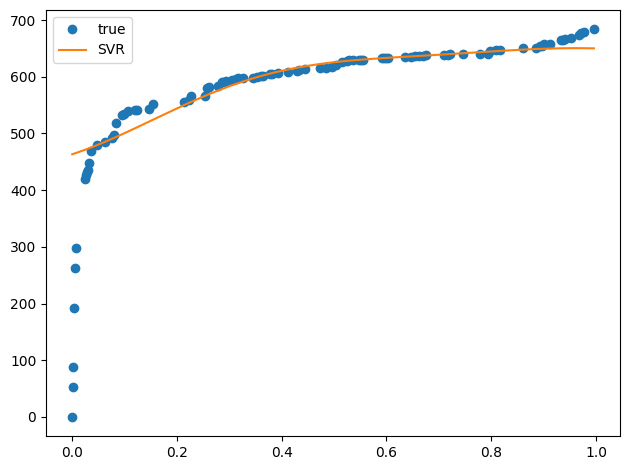

In [14]:
# svr_model_ = f"svr_model.pickle"
# print(f"Save model to file {svr_model_} ... ", end="")
# pickle.dump(svr_model, open(svr_model_, "wb"))
# print("OK")

X_test = np.sort(X_test, axis=0)

y_test = np.sort(y_test, axis=0)

y_pred_2 = svr_model.predict(X_test)
print(r2_score(y_test, y_cv_svr_))

plt.plot(X_test, y_test, 'o', label='true')
plt.plot(X_test, y_pred_2, '-', label='SVR')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=280, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

c:\Python36\lib\site-packages\sklearn\gaussian_process\kernels.py:418: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\Python36\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)


316**2 * RBF(length_scale=0.01)

In [ ]:
r2_ = 0.99
r2_train_ = 0.0
r2_test_ = 0.0
max_ = 0
while r2_test_ < float(r2_):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)
    
    kernel = 1 * RBF(length_scale=280, length_scale_bounds=(1e-2, 1e2))
    gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    gaussian_process.fit(X_train, y_train)
    
    y_train_predicted_svr_, a = gaussian_process.predict(X_train, return_std=True)
    y_test_predicted_svr_, a = gaussian_process.predict(X_test, return_std=True)
    
    rmse_train_ = np.sqrt(mean_squared_error(y_train, y_train_predicted_svr_))
    r2_train_ = r2_score(y_train, y_train_predicted_svr_)
    mae_train_ = mean_absolute_error(y_train, y_train_predicted_svr_)
    # Evaluating test dataset
    rmse_test_ = np.sqrt(mean_squared_error(y_test, y_test_predicted_svr_))
    r2_test_ = r2_score(y_test, y_test_predicted_svr_)
    mae_test_ = mean_absolute_error(y_test, y_test_predicted_svr_)
    
    if r2_test_ > max_:
        max_ = r2_test_
        print("R2 score of test is {}".format(max_))
        
print("-------------------------------------------")
print("RMSE of training is {}".format(rmse_train_))
print("R2 score of training  is {}".format(r2_train_))
print("MAE of training is {}".format(mae_train_))
print("RMSE of test is {}".format(rmse_test_))
print("R2 score of test is {}".format(max_))
print("MAE of test is {}".format(mae_test_))

c:\Python36\lib\site-packages\sklearn\gaussian_process\_gpr.py:506: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Python36\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\Python36\lib\site-packages\sklearn\gaussian_process\_gpr.py:372: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
c:\Python36\lib\site-packages\sklearn\gaussian_process\_gpr.py:372: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(

R2 score of test is 0.9986723397029087
-------------------------------------------
RMSE of training is 2.1034634296178325
R2 score of training  is 0.9997969383693596
MAE of training is 0.7397583914970796
RMSE of test is 2.9536730668977924
R2 score of test is 0.9986723397029087
MAE of test is 0.493140655020975


c:\Python36\lib\site-packages\sklearn\gaussian_process\kernels.py:418: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\Python36\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\Python36\lib\site-packages\sklearn\gaussian_process\_gpr.py:372: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


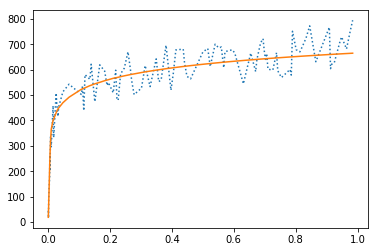

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)

noise = np.random.uniform(-100, 100, len(y_test)).reshape(len(y_test),1)

X_test = np.sort(X_test, axis=0)

y_test = np.sort(y_test, axis=0) + noise

mean_prediction, std_prediction = gaussian_process.predict(X_test, return_std=True)

# score_ = gaussian_process.score(X,y)
# print(score_)

plt.plot(X_test, y_test, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
# plt.scatter(X_train, y_train, label="Observations")
plt.plot(X_test, mean_prediction, label="Mean prediction")
# plt.fill_between(
    # X.ravel(),
    # mean_prediction - 1.96 * std_prediction,
    # mean_prediction + 1.96 * std_prediction,
    # alpha=0.5,
    # label=r"95% confidence interval",
# )
# plt.legend()
# plt.xlabel("$x$")
# plt.ylabel("$f(x)$")
# _ = plt.title("Gaussian process regression on noise-free dataset")

plt.show()